In [1]:
import pickle

pickle_file = '-catsdogs.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X_train = save['X_train']
    y_train = save['y_train']
    X_test = save['X_test']
    y_test = save['y_test']
    del save  # hint to help gc free up memory
    print('Training set', X_train.shape, y_train.shape)
    print('Test set', X_test.shape, y_test.shape)

('Training set', (14000, 64, 64), (14000, 1))
('Test set', (6000, 64, 64), (6000, 1))


In [4]:
## implement your CNN starting here.
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K

K.set_image_dim_ordering('tf')

print "using ordering:", K.image_dim_ordering()

using ordering: tf


In [5]:
num_classes = 2
img_rows, img_cols = X_train.shape[1],  X_train.shape[2]

print X_train.shape
print img_rows, img_cols

if K.image_dim_ordering()== 'th':
    X_train = X_train.reshape(X_train.shape[0],1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

print X_train.shape
print y_train.shape

(14000, 64, 64)
64 64
(14000, 64, 64, 1)
(14000, 1)


(64, 64)
(14000, 1)


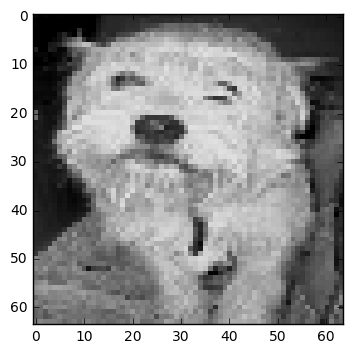

In [6]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 0

if K.image_dim_ordering() == 'th':
    img = X_train[img_num][0,:,:]
else:
    img = X_train[img_num][:,:,0]

print img.shape
print y_train.shape
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

In [7]:
# model hyperparameters
batch_size = 128
nb_epoch = 30

# network architecture
patch_size_1 = 3
patch_size_2 = 3
patch_size_3 = 3

depth_1 = 20
depth_2 = 40
depth_3 = 80

pool_size = 2

num_hidden_1 = 1000
num_hidden_2 = 1000
num_hidden_3 = 1000

dropout = 0.5

In [8]:
# create new Keras Sequential model
model = Sequential()

# add first convolutional layer to model and specify it's depth and filter size
# for the first layer we also have to specify the size of each input image
# which we calculated above
model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='valid',
                        input_shape=input_shape))
# apply 'relu' activation function for first layer
model.add(Activation('relu'))
# apply max pooling to reduce the size of the image by a factor of 2
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# repeat these operations for the second convolutional layer
# this time Keras can figure out the input size 
# from the previous layer on it's own
model.add(Convolution2D(depth_2, patch_size_2, patch_size_2,
                        border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_3, patch_size_3, patch_size_3,border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# flatten the three-dimensional convolutional layer to a single layer of neurons
model.add(Flatten())

# add the first fully connected layer, applying 'relu' activation and dropout
model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# add the second fully connected layer
model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# add the third fully connected layer
model.add(Dense(num_hidden_3))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# add the final classification layer with the number of neurons 
# matching the number of classes we are trying to learn
model.add(Dense(num_classes))

# apply the 'softmax' activation to the final layer to convert the output to 
# a probability distribution
model.add(Activation('softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 14000 samples, validate on 6000 samples
Epoch 1/30
14000/14000 [==============================] - 91s - loss: 0.6920 - acc: 0.5245 - val_loss: 0.6869 - val_acc: 0.5032
Epoch 2/30
14000/14000 [==============================] - 119s - loss: 0.6787 - acc: 0.5706 - val_loss: 0.6683 - val_acc: 0.5897
Epoch 3/30
14000/14000 [==============================] - 113s - loss: 0.6582 - acc: 0.6149 - val_loss: 0.6457 - val_acc: 0.6318
Epoch 4/30
14000/14000 [==============================] - 80s - loss: 0.6456 - acc: 0.6299 - val_loss: 0.6454 - val_acc: 0.6322
Epoch 5/30
14000/14000 [==============================] - 80s - loss: 0.6355 - acc: 0.6374 - val_loss: 0.6216 - val_acc: 0.6613
Epoch 6/30
14000/14000 [==============================] - 83s - loss: 0.6158 - acc: 0.6659 - val_loss: 0.5981 - val_acc: 0.6810
Epoch 7/30
14000/14000 [==============================] - 82s - loss: 0.5781 - acc: 0.7011 - val_loss: 0.5877 - val_acc: 0.6920
Epoch 8/30
14000/14000 [=============================

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)

print 'Test score:', score[0]
print 'Test accuracy: {:.2%}'.format(score[1])

Test score: 0.937114454508
Test accuracy: 81.80%
